### Bagging & Boosting in terms of base learner 튜토리얼
##### 데이터 불러오기 및 전처리

In [1]:
import torchvision.datasets as datasets

import warnings
warnings.filterwarnings(action='ignore')

trainset = datasets.MNIST(root='./data', train=True, download=False)
testset = datasets.MNIST(root='./data', train=False, download=False)

X_train, y_train = trainset.data.numpy().reshape(-1,28*28), trainset.targets.numpy()
X_test, y_test = testset.data.numpy().reshape(-1,28*28), testset.targets.numpy()

X = {'train':X_train, 'test':X_test}
y = {'train':y_train, 'test':y_test}

print(f'X train : {X_train.shape}, y train : {y_train.shape}')
print(f'X test : {X_test.shape}, y test : {y_test.shape}')

c:\Users\korea\anaconda3\envs\py39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X train : (60000, 784), y train : (60000,)
X test : (10000, 784), y test : (10000,)


##### 실험 설계

In [2]:
import time
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from utils import set_seed

def ensemble_exp(X:dict, y:dict, method:str='Bagging', max_depth:int=1, seed:int=0):
    
    # set seed
    set_seed(seed)
    
    # set base learner & ensemble model
    base_learner = DecisionTreeClassifier(max_depth=max_depth)
    
    if method == 'Bagging':
        ensemble = BaggingClassifier(base_estimator=base_learner,
                                     n_estimators=50,
                                     random_state=seed)
        
    elif method == 'Boosting':
        ensemble = AdaBoostClassifier(base_estimator=base_learner,
                                      n_estimators=50,
                                      random_state=seed)
    else:
        ensemble = RandomForestClassifier(n_estimators=50,
                                          max_depth=max_depth,
                                          random_state=seed)
    
    # train ensemble model
    ensemble.fit(X['train'], y['train'])
    
    # evaluate ensemble model with testset
    y_pred = ensemble.predict(X['test'])
    accuracy = accuracy_score(y['test'], y_pred)
    
    return accuracy
    
def repeat_exp(X, y, method, depth_list, seed_list):
    
    # experiments
    print(f'{method} based Ensemble training start...')
    results_df = pd.DataFrame(columns=['method','seed','max_depth','acc','time'])
    for depth in depth_list:
        for seed in seed_list:
            # check training time
            since = time.time()
            acc = ensemble_exp(X, y, method, depth, seed)
            after = time.time()-since
            
            crt_results = {'method':method,
                           'seed':seed,
                           'max_depth':depth,
                           'acc':round(acc*100,2),
                           'time':round(after,2)}
            crt_df = pd.DataFrame([crt_results])
            results_df = pd.concat([results_df, crt_df],ignore_index=True)
            
            print(f'method : {method} | seed : {seed} | max_depth : {depth}')
            print(f'acc : {round(acc*100,2)} | time : {round(after,2)} \n')
    
    return results_df

##### 실험

In [3]:
# set seed list
seed_list = [0,1,2,3,4]

# set max depth list
depth_list = [1,2,4,8,16]

# Decision tree based bagging experiments
bagging_df = repeat_exp(X, y, 
                        method='Bagging', 
                        seed_list=seed_list,
                        depth_list=depth_list)

Bagging based Ensemble training start...
method : Bagging | seed : 0 | max_depth : 1
acc : 37.2 | time : 23.61 

method : Bagging | seed : 1 | max_depth : 1
acc : 32.66 | time : 23.34 

method : Bagging | seed : 2 | max_depth : 1
acc : 27.37 | time : 23.45 

method : Bagging | seed : 3 | max_depth : 1
acc : 32.64 | time : 23.39 

method : Bagging | seed : 4 | max_depth : 1
acc : 32.66 | time : 23.62 

method : Bagging | seed : 0 | max_depth : 2
acc : 46.19 | time : 37.46 

method : Bagging | seed : 1 | max_depth : 2
acc : 41.97 | time : 37.38 

method : Bagging | seed : 2 | max_depth : 2
acc : 40.59 | time : 37.47 

method : Bagging | seed : 3 | max_depth : 2
acc : 42.46 | time : 37.47 

method : Bagging | seed : 4 | max_depth : 2
acc : 41.59 | time : 37.6 

method : Bagging | seed : 0 | max_depth : 4
acc : 71.8 | time : 71.23 

method : Bagging | seed : 1 | max_depth : 4
acc : 71.25 | time : 71.38 

method : Bagging | seed : 2 | max_depth : 4
acc : 68.69 | time : 72.44 

method : Bagg

In [4]:
# Adaboost(boosting method) experiments
boosting_df = repeat_exp(X, y, 
                        method='Boosting', 
                        seed_list=seed_list,
                        depth_list=depth_list)

Boosting based Ensemble training start...
method : Boosting | seed : 0 | max_depth : 1
acc : 72.99 | time : 46.48 

method : Boosting | seed : 1 | max_depth : 1
acc : 72.99 | time : 46.51 

method : Boosting | seed : 2 | max_depth : 1
acc : 72.99 | time : 47.02 

method : Boosting | seed : 3 | max_depth : 1
acc : 72.99 | time : 47.69 

method : Boosting | seed : 4 | max_depth : 1
acc : 72.99 | time : 47.29 

method : Boosting | seed : 0 | max_depth : 2
acc : 78.57 | time : 84.87 

method : Boosting | seed : 1 | max_depth : 2
acc : 78.57 | time : 83.92 

method : Boosting | seed : 2 | max_depth : 2
acc : 78.57 | time : 84.13 

method : Boosting | seed : 3 | max_depth : 2
acc : 78.57 | time : 83.67 

method : Boosting | seed : 4 | max_depth : 2
acc : 78.57 | time : 84.15 

method : Boosting | seed : 0 | max_depth : 4
acc : 82.17 | time : 155.35 

method : Boosting | seed : 1 | max_depth : 4
acc : 82.25 | time : 154.67 

method : Boosting | seed : 2 | max_depth : 4
acc : 82.26 | time : 15

In [6]:
# Random forest experiments
rf_df = repeat_exp(X, y, 
                    method='Random_forest', 
                    seed_list=seed_list,
                    depth_list=depth_list)

Random_forest based Ensemble training start...
method : Random_forest | seed : 0 | max_depth : 1
acc : 53.71 | time : 1.27 

method : Random_forest | seed : 1 | max_depth : 1
acc : 51.06 | time : 1.25 

method : Random_forest | seed : 2 | max_depth : 1
acc : 51.13 | time : 1.26 

method : Random_forest | seed : 3 | max_depth : 1
acc : 49.58 | time : 1.27 

method : Random_forest | seed : 4 | max_depth : 1
acc : 52.51 | time : 1.26 

method : Random_forest | seed : 0 | max_depth : 2
acc : 63.87 | time : 2.21 

method : Random_forest | seed : 1 | max_depth : 2
acc : 61.31 | time : 2.24 

method : Random_forest | seed : 2 | max_depth : 2
acc : 63.53 | time : 2.17 

method : Random_forest | seed : 3 | max_depth : 2
acc : 60.86 | time : 2.18 

method : Random_forest | seed : 4 | max_depth : 2
acc : 64.64 | time : 2.57 

method : Random_forest | seed : 0 | max_depth : 4
acc : 81.15 | time : 4.03 

method : Random_forest | seed : 1 | max_depth : 4
acc : 81.06 | time : 4.0 

method : Random_fo

##### 실험 결과

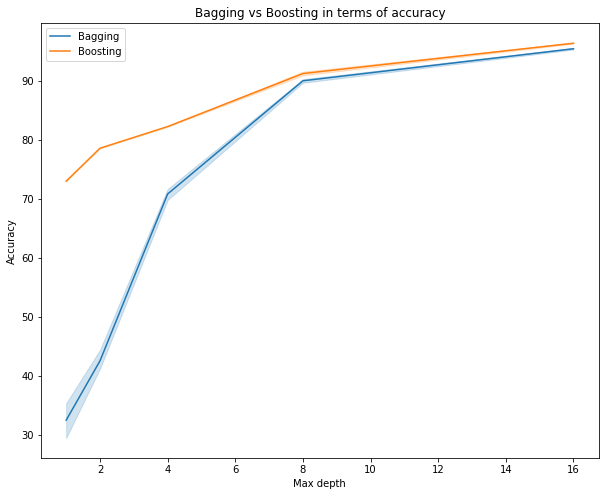

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# accuracy vs max_depth line plot
plt.figure(figsize=(10,8))

sns.lineplot(data=bagging_df, x='max_depth', y='acc', label='Bagging')
sns.lineplot(data=boosting_df, x='max_depth', y='acc', label='Boosting')

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Bagging vs Boosting in terms of accuracy')

plt.legend()
plt.show()


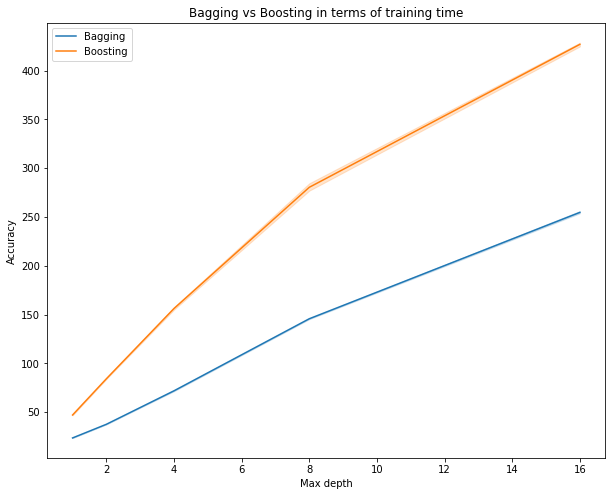

In [8]:
# time vs max_depth line plot
plt.figure(figsize=(10,8))

sns.lineplot(data=bagging_df, x='max_depth', y='time', label='Bagging')
sns.lineplot(data=boosting_df, x='max_depth', y='time', label='Boosting')

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Bagging vs Boosting in terms of training time')

plt.legend()
plt.show()

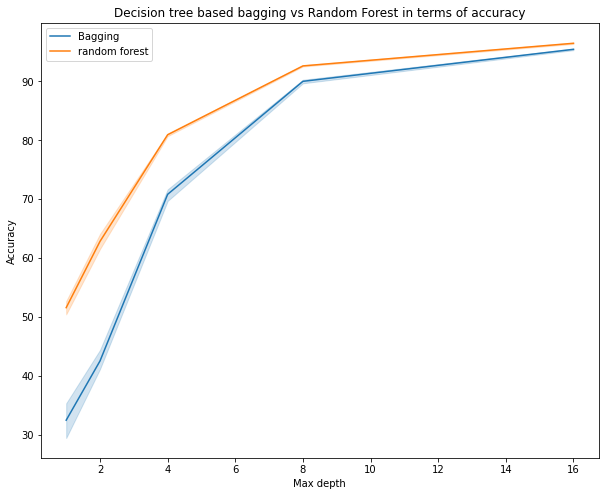

In [9]:
# decision tree based bagging vs random forest in terms of accuracy
plt.figure(figsize=(10,8))

sns.lineplot(data=bagging_df, x='max_depth', y='acc', label='Bagging')
sns.lineplot(data=rf_df, x='max_depth', y='acc', label='random forest')

plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Decision tree based bagging vs Random Forest in terms of accuracy')

plt.legend()
plt.show()

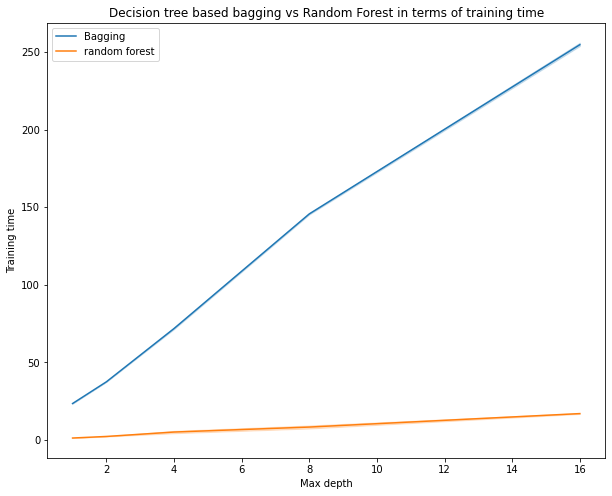

In [10]:
# decision tree based bagging vs random forest in terms of training time
plt.figure(figsize=(10,8))

sns.lineplot(data=bagging_df, x='max_depth', y='time', label='Bagging')
sns.lineplot(data=rf_df, x='max_depth', y='time', label='random forest')

plt.xlabel('Max depth')
plt.ylabel('Training time')
plt.title('Decision tree based bagging vs Random Forest in terms of training time')

plt.legend()
plt.show()

In [30]:
import pandas as pd

In [32]:
pd.DataFrame([a])

,method,seed,max_depth,acc
0,a,1,1,57


In [19]:
base_learner = DecisionTreeClassifier(max_depth=2)

In [20]:
ada = AdaBoostClassifier(base_estimator=base_learner)

In [21]:
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))

In [22]:
from sklearn.metrics import accuracy_score

y_pred = ada.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7857
